In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import csv
from scipy import stats
%matplotlib inline

# Initialisation
## Données

In [2]:
with open('Donnees_simulees/growthR_sim.npy', 'rb') as f:
    wt_sim = np.load(f)
    wt_sim = wt_sim[:,wt_sim[0,:]!=0]
with open('Donnees_simulees/growthR_sim_noisy.npy', 'rb') as f:
    wt_sim_noise = np.load(f)
    wt_sim_noise = wt_sim_noise[:,wt_sim_noise[0,:]!=0]

## Fonctions générales

In [3]:
def fourier_inverse(X,Xi,F_Xi):
    return [(Xi[1]-Xi[0])*np.sum(F_Xi*np.exp(1j*x*Xi))/(2*np.pi) for x in X]

def get_fourier_wt(Xi,Wt):
    return [np.mean(np.exp(-1j*xi*Wt[Wt>0])) for xi in Xi]

def get_fourier_log_wt(Xi,Wt):
    return [np.mean(np.exp(-1j*xi*np.log(Wt[Wt>0]))) for xi in Xi]

In [4]:
def draw_log_log(wt,ximin,ximax,nbreaks_xi,tmax,n_renorm=0,titre=""):
    
    Xi = np.linspace(ximin,ximax,nbreaks_xi)
    tot = np.abs([get_fourier_log_wt(Xi,wt[t]) for t in range(tmax)])
    
    if n_renorm > 0 :    # number of initial growth rate measures considered to renormalise
        tot = tot/np.median(tot[:n_renorm,:], axis=0)
    
    tot = np.log(tot)
        
    # régression linéaire:
    for k in range(nbreaks_xi):
        slope, intercept, r_value, p_value, std_err = stats.linregress(range(tmax),np.real(tot)[:,k])
        plt.plot(range(tmax),[intercept+t*slope for t in range(tmax)])
        print("pente :",slope)
    # affichage:
    plt.plot(range(tmax),tot)
    plt.grid()
    plt.legend(["xi="+str(xi) for xi in Xi])
    plt.xlabel("t")
    plt.ylabel("ln[Fu_t(xi)]")
    plt.title(titre)
    plt.show() 

In [5]:
n = 5   # number of initial growth rate measures considered to renormalise
wt_sim_norm=wt_sim/np.median(wt_sim[:n,:], axis=0)

# Estimation de $a_{\xi}$


## Travail sur l'estimation de $\Re(a_{\xi})$

pente : -2.0394236716598e-07
pente : -8.222199771626908e-06
pente : -2.6005655671473085e-05
pente : -4.9165643634846695e-05
pente : -7.229855124035518e-05
pente : -9.069006589511991e-05
pente : -0.00010181231228522194
pente : -0.0001060667571887506
pente : -0.0001064957061050388
pente : -0.00010760280475328053


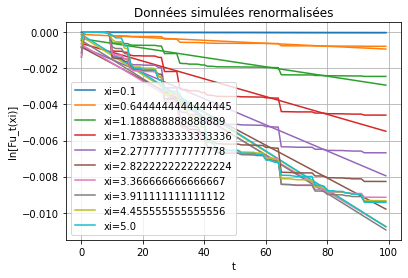

pente : -2.6325563063183747e-07
pente : -9.959131371888766e-06
pente : -2.78265420630381e-05
pente : -4.952566471934376e-05
pente : -7.215385402355756e-05
pente : -9.050487110216834e-05
pente : -0.00010349466226415704
pente : -0.00010555609975096307
pente : -0.00010333362283867046
pente : -0.00010240403746214369


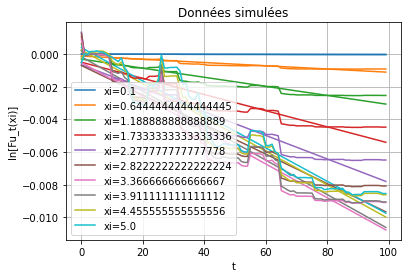

In [6]:
draw_log_log(wt_sim_norm,ximin=0.1,ximax=5,nbreaks_xi=10,tmax=100,n_renorm=5,titre="Données simulées renormalisées")
draw_log_log(wt_sim,ximin=0.1,ximax=5,nbreaks_xi=10,tmax=100,n_renorm=5,titre="Données simulées")

$\to$ les formes et les pentes sont similaires !

pente : -0.00010760280475328053
pente : -0.0001335051632422624
pente : -0.00019610937663563585
pente : -0.00025667506877884703
pente : -0.00028270551085145723


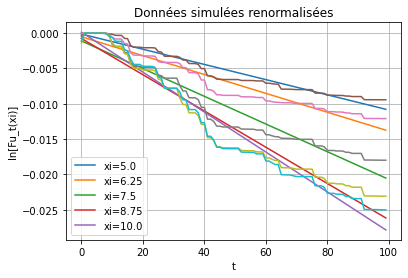

pente : -0.00010240403746214369
pente : -0.00013130962976932572
pente : -0.00022227087963207987
pente : -0.00033234923302045147
pente : -0.0003739253352974362


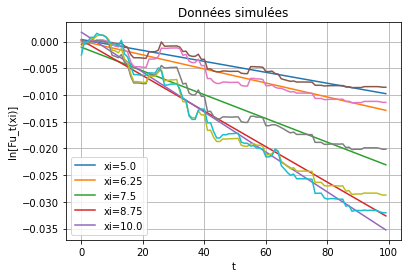

In [7]:
draw_log_log(wt_sim_norm,ximin=5,ximax=10,nbreaks_xi=5,tmax=100,n_renorm=5,titre="Données simulées renormalisées")
draw_log_log(wt_sim,ximin=5,ximax=10,nbreaks_xi=5,tmax=100,n_renorm=5,titre="Données simulées")

$\to$ la similarité est moins bonne quand $\xi$ augmente.

pente : -0.00028270551085145723
pente : -0.0003559258353647904
pente : -0.00044318880551215693
pente : -0.0004955518239461304
pente : -0.0004647308019782093


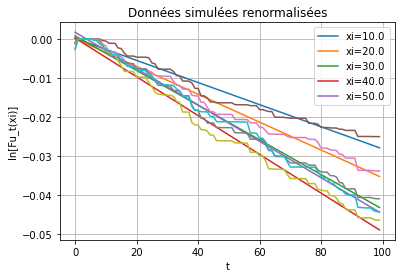

pente : -0.0003739253352974362
pente : -0.0003379298054723622
pente : -0.0030697979660868017
pente : -0.00344495243779158
pente : -0.0009232364494378455


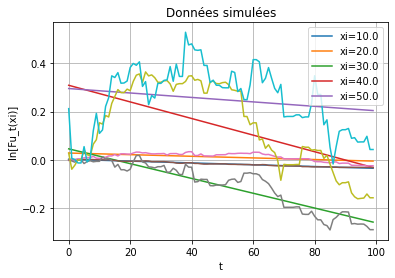

In [8]:
draw_log_log(wt_sim_norm,ximin=10,ximax=50,nbreaks_xi=5,tmax=100,n_renorm=5,titre="Données simulées renormalisées")
draw_log_log(wt_sim,ximin=10,ximax=50,nbreaks_xi=5,tmax=100,n_renorm=5,titre="Données simulées")

$\to$ les données non-renormalisées ne sont pas des droites : pourquoi ?

$\to$ les pentes n'ont plus de sens.

## Travail sur l'estimation de $\Im(a_{\xi})$

In [9]:
draw_log_arg(wt_sim_norm,ximin=0.1,ximax=5,nbreaks_xi=10,tmax=100,n_renorm=5,titre="Données simulées renormalisées")
draw_log_arg(wt_sim,ximin=0.1,ximax=5,nbreaks_xi=10,tmax=100,n_renorm=5,titre="Données simulées")

NameError: name 'draw_log_arg' is not defined

$\to$ correspondance potable des pentes

In [ ]:
draw_log_arg(wt_sim_norm,ximin=10,ximax=100,nbreaks_xi=5,tmax=100,n_renorm=5,titre="Données simulées renormalisées")
draw_log_arg(wt_sim,ximin=10,ximax=100,nbreaks_xi=5,tmax=100,n_renorm=5,titre="Données simulées")

$\to$ pentes toujours pas potables pour les grandes valeurs de $\xi$

# Conclusion

Si on ne considère que les petites valeurs de $\xi$: la correspondance entre les données normalisées et les données non normalisées est très bonne (en principe, les pentes devraient être identiques).

Si on considère les grandes valeurs de $\xi$: on n'obtient plus de droite pour les données non normalisées. C'est mystérieux: erreur dans les calculs ? erreur dans le code ? erreur d'approximation ?

On obtient, tout de même, de belles droites pour les données normalisées. Cependant, on ne peut pas normaliser les données réelles car l'erreur devient trop grande.